In [194]:
import numpy as np
import pandas as pd
import os
import cv2
from skimage.io import imread
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA   
from sklearn.model_selection import train_test_split
import seaborn as sns
import time        

In [179]:
#fanction that change the size and the color of the pictures 
def readImg_gray(file_path):
    img = cv2.imread(file_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (64,64))
    return resized_img

In [195]:
#fanction to change from tictures to Array
def TrainToArr(name, num):    
    m=12500
    n_x = 64*64
    X = np.ndarray((m,n_x), dtype=np.uint8)
    y = np.zeros((m,1))
    folder = 'train/'
    for i in range(m):
        img = readImg_gray(folder + name+ '.' + str(i) + '.jpg')
        X[i,:] = np.squeeze(img.reshape((n_x,1)))
        y[i,0] = num
    return X,y

In [196]:
#we got:
X_dog,Y_dog=TrainToArr('dog', num=1)
X_cat,Y_cat=TrainToArr('cat', num=0)

#### Cat data

In [138]:
X_Cat=pd.DataFrame(data=X_cat)
print (X_Cat.shape)
X_Cat.head()

(12500, 4096)


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,170,176,183,188,192,196,200,202,205,208,...,10,9,3,3,3,2,2,2,2,2
1,43,42,36,29,41,43,72,38,37,37,...,77,64,38,39,56,58,53,72,68,29
2,52,46,61,64,130,134,75,210,194,171,...,60,46,60,48,48,32,49,44,42,49
3,156,169,191,190,185,141,124,127,132,201,...,133,182,192,146,190,173,195,176,171,181
4,141,158,166,172,173,177,179,181,182,184,...,12,11,11,11,13,10,11,12,10,9


In [139]:
X_Cat['label'] = Y_cat
cat_data=X_Cat
cat_data.head()
#the cat dataset

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,170,176,183,188,192,196,200,202,205,208,...,9,3,3,3,2,2,2,2,2,0.0
1,43,42,36,29,41,43,72,38,37,37,...,64,38,39,56,58,53,72,68,29,0.0
2,52,46,61,64,130,134,75,210,194,171,...,46,60,48,48,32,49,44,42,49,0.0
3,156,169,191,190,185,141,124,127,132,201,...,182,192,146,190,173,195,176,171,181,0.0
4,141,158,166,172,173,177,179,181,182,184,...,11,11,11,13,10,11,12,10,9,0.0


#### Dog Data

In [140]:
X_Dog=pd.DataFrame(data=X_dog)
print (X_Dog.shape)
X_Dog.head()

(12500, 4096)


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,115,144,161,163,131,134,128,137,140,141,...,143,96,94,84,79,75,71,76,74,86
1,110,122,101,110,94,116,107,120,119,84,...,239,247,242,233,245,246,245,240,239,233
2,178,161,164,135,165,168,162,167,166,162,...,195,190,190,193,196,199,202,206,211,217
3,227,224,203,202,211,220,223,201,195,240,...,167,171,170,171,166,168,172,168,166,164
4,150,149,149,153,153,154,157,158,151,146,...,170,166,157,152,105,65,62,56,36,38


In [141]:
X_Dog['label'] = Y_dog
dog_data= X_Dog
dog_data.head()
#the Dog dataset

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,115,144,161,163,131,134,128,137,140,141,...,96,94,84,79,75,71,76,74,86,1.0
1,110,122,101,110,94,116,107,120,119,84,...,247,242,233,245,246,245,240,239,233,1.0
2,178,161,164,135,165,168,162,167,166,162,...,190,190,193,196,199,202,206,211,217,1.0
3,227,224,203,202,211,220,223,201,195,240,...,171,170,171,166,168,172,168,166,164,1.0
4,150,149,149,153,153,154,157,158,151,146,...,166,157,152,105,65,62,56,36,38,1.0


In [149]:
img=dog_data[0]
img_arr=cv2.imread(img,cv2.IMREAD_COLOR)
plt.imshow(img_arr)
plt.show

TypeError: Can't convert object of type 'Series' to 'str' for 'filename'

#### Union the Dog&Cat data sets: 

In [143]:
train_data=pd.concat([cat_data,dog_data])
train_data=train_data.sample(frac=1)
train_data.head()
#this is our train dataset

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
4162,95,132,120,109,111,117,107,121,129,117,...,125,126,121,83,92,82,19,22,22,0.0
2356,91,127,143,137,130,110,114,139,126,192,...,55,102,103,100,152,119,39,82,121,1.0
7716,100,116,116,111,85,105,103,103,106,105,...,64,64,76,73,72,74,75,77,89,0.0
3493,77,91,85,57,99,60,72,52,94,89,...,92,79,70,94,58,93,113,63,110,1.0
3290,34,41,44,46,34,28,30,36,35,36,...,105,108,105,109,97,97,91,91,86,0.0


In [144]:
#lets split the data for x and y so we can to normalize the x data
x= train_data.drop(['label'],axis=1)
y=train_data['label']

In [145]:
#Normalize the data:
tmp=x.values
min_max_scaler=MinMaxScaler()
scaled=min_max_scaler.fit_transform(tmp)
x=pd.DataFrame(scaled)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.372549,0.517647,0.470588,0.427451,0.435294,0.458824,0.419608,0.474510,0.505882,0.458824,...,0.454902,0.490196,0.494118,0.474510,0.325490,0.360784,0.321569,0.074510,0.086275,0.086275
1,0.356863,0.498039,0.560784,0.537255,0.509804,0.431373,0.447059,0.545098,0.494118,0.752941,...,0.156863,0.215686,0.400000,0.403922,0.392157,0.596078,0.466667,0.152941,0.321569,0.474510
2,0.392157,0.454902,0.454902,0.435294,0.333333,0.411765,0.403922,0.403922,0.415686,0.411765,...,0.239216,0.250980,0.250980,0.298039,0.286275,0.282353,0.290196,0.294118,0.301961,0.349020
3,0.301961,0.356863,0.333333,0.223529,0.388235,0.235294,0.282353,0.203922,0.368627,0.349020,...,0.333333,0.360784,0.309804,0.274510,0.368627,0.227451,0.364706,0.443137,0.247059,0.431373
4,0.133333,0.160784,0.172549,0.180392,0.133333,0.109804,0.117647,0.141176,0.137255,0.141176,...,0.415686,0.411765,0.423529,0.411765,0.427451,0.380392,0.380392,0.356863,0.356863,0.337255


In [128]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [63]:
pd.DataFrame(data=y_train)

,label
5086,1.0
7085,1.0
3937,0.0
10947,1.0
6304,0.0
...,...
8625,0.0
5554,0.0
8046,1.0
362,0.0


### now we will use diffrent Models to classify the data

In [163]:
#training and predicting on the PCA-d data using-
#K-Neighbors
#Decision Tree
#Random Forest
#AdaBoost
#Gradient Boosting
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns

## KNN

Confusion Matrix for KNN


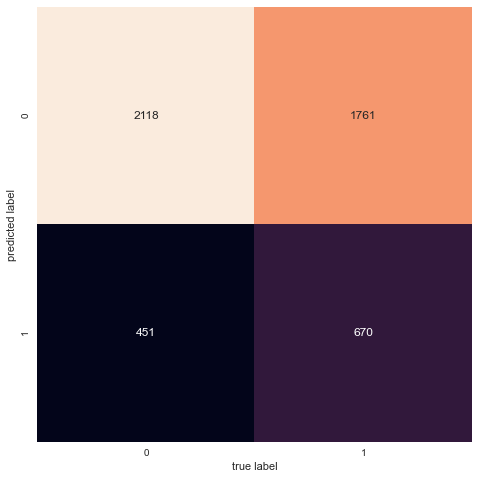

              precision    recall  f1-score   support

         0.0       0.55      0.82      0.66      2569
         1.0       0.60      0.28      0.38      2431

    accuracy                           0.56      5000
   macro avg       0.57      0.55      0.52      5000
weighted avg       0.57      0.56      0.52      5000

This KNN model's Accuracy Score with cross validation is  [0.5744 0.5648 0.5416 0.5432]


0.5576

In [129]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
y_pred=knn.predict(X_test)
plt.figure(1, figsize= (8,8))
cm=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print("Confusion Matrix for KNN")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close() 
print(classification_report(y_test,y_pred))
score= cross_val_score(knn, X_test, y_test, cv=4,scoring='accuracy')
print("This KNN model's Accuracy Score with cross validation is ", score)
knn.score(X_test, y_test)

#for the ORIGINAL data

#### after Normalization we can lower dimensions by using PCA:

In [146]:
pca= PCA(n_components=16)
X_reduced = pca.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

X_reduced.shape

(25000, 16)

Time taken to achive result: 0.08681559562683105 seconds
Confusion Matrix for KNN


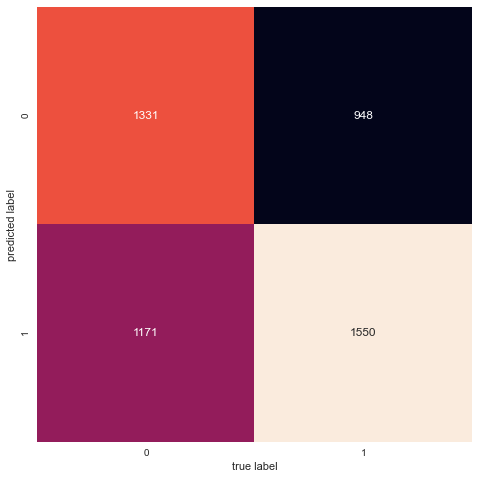

              precision    recall  f1-score   support

         0.0       0.58      0.53      0.56      2502
         1.0       0.57      0.62      0.59      2498

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.58      0.58      0.58      5000

This KNN model's Accuracy Score with cross validation is  [0.5592 0.5648 0.548  0.5736]


0.5762

In [154]:
knnStartTime=time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knnTimeTaken=time.time() -knnStartTime
print("Time taken to achive result: %s seconds" % (knnTimeTaken))
y_pred=knn.predict(X_test)
plt.figure(1, figsize= (8,8))
cm=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print("Confusion Matrix for KNN")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close() 
print(classification_report(y_test,y_pred))
score= cross_val_score(knn, X_test, y_test, cv=4,scoring='accuracy')
print("This KNN model's Accuracy Score with cross validation is ", score)
knn.score(X_test, y_test)


#for the PCA data

In [126]:
km = KMeans(n_clusters=4, random_state=1,max_iter=100)
X_reduced = km.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

X_reduced.shape

(25000, 4)

In [125]:
km = KMeans(n_clusters=4, random_state=1,max_iter=100).fit(X_train)
y_km= km.predict(X_test)

In [122]:
print(classification_report(y_test,y_km))

              precision    recall  f1-score   support

         0.0       0.62      0.11      0.18      2569
         1.0       0.44      0.07      0.13      2431
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0

    accuracy                           0.09      5000
   macro avg       0.09      0.02      0.03      5000
weighted avg       0.53      0.09      0.16      5000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K MEANS

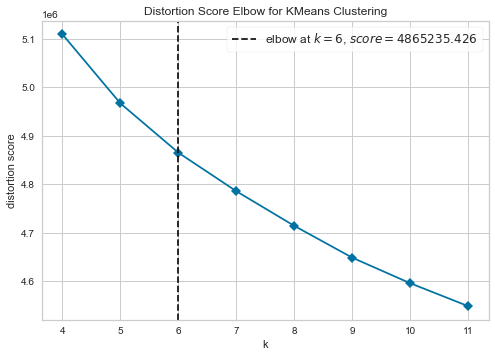

In [104]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(4,12), timings=False)
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [172]:
kmStartTime=time.time()
km = KMeans(n_clusters=4, random_state=1,max_iter=100)
km.fit(X_train, y_train)
y_km= km.predict(X_test)
print("Precision = {}".format(precision_score(y_test, y_km, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_km, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_km)))
xgbTimeTaken=time.time() -xgbStartTime
kmTimeTaken=time.time() -kmStartTime
print("Time taken to achive result: %s seconds" % (kmTimeTaken))

Precision = 0.25002081133278153
Recall = 0.11288863224872464
Accuracy = 0.2258
Time taken to achive result: 0.36031365394592285 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XGBoost

In [170]:
xgbStartTime=time.time()
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred=xgb_clf.predict(X_test)

print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
xgbTimeTaken=time.time() -xgbStartTime
print("Time taken to achive result: %s seconds" % (xgbTimeTaken))

[19:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision = 0.6221519036159446
Recall = 0.6216263178408434
Accuracy = 0.6216
Time taken to achive result: 1.6351113319396973 seconds


## GradientBoosting

In [176]:
gbcStartTime=time.time()
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
gbcTimeTaken=time.time() -gbcStartTime
print("Time taken to achive result: %s seconds" % (gbcTimeTaken))


              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60      2502
         1.0       0.61      0.68      0.64      2498

    accuracy                           0.62      5000
   macro avg       0.63      0.63      0.62      5000
weighted avg       0.63      0.62      0.62      5000

Accuracy = 0.625
Time taken to achive result: 9.096662759780884 seconds
